“I think greed is healthy. You can be greedy and still feel good about yourself.”  
 &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>-Ivan Boesky</b>

# KNAPSACK AND GRAPH OPTIMIZATION PROBLEMS

In genral an optimization problem has two parts;  
   - An objective function to be optimized 
   - A set of contaraints 

# Knapsack Problems

Suppose a burgler enters into a house with a knapsack but there are lots of things and his knapsack can hold upto 20 pounds. He has to decide which are the most important things for him and what to leaave behind.
| Item | Value | Weight | Value/Weight |
|----------|----------|----------|---------|
| Clock | 175 | 10 | 17.5 |
| Painting | 90| 9 | 10 |
| Radio | 20 | 4 | 5 |
| Vase | 50 | 2 | 25 |
|Book | 10 | 1 | 10 |
|Computer| 200 | 20 | 10 |


# Greedy Algorithms

In [1]:
class Item(object):
    def __init__(self,n,v,w):
        self._name = n 
        self._value = v
        self._weight = w
    
    def get_name(self):
        return self._name
    def get_value(self):
        return self._value
    def get_weight(self):
        return self._weight
    def __str__(self):
        result = '<' + self._name + ', ' + str(self._value)\
                + ', ' + str(self._weight) + '>'
        return result

In [2]:
def value(item):
    return item.get_value()
def weight_inverse(item):
    return 1.0/(item.get_weight())
def density(item):
    return item.get_value()/item.get_weight()

In [3]:
def greedy(items,max_weight,key_function):
    """Assumes items a list, max_weight>=0.
    key_funtion maps elements of the items to the numbers."""
    items_copy = sorted(items,key=key_function,reverse=True)
    result = []
    total_value,total_weght = 0.0, 0.0 
    for i in range(len(items_copy)):
        if (total_weght+items_copy[i].get_weight()) <= max_weight:
            result.append(items_copy[i])
            total_weght +=items_copy[i].get_weight()
            total_value +=items_copy[i].get_value()
    return (result,total_value)

In [4]:
def build_items():
    names = ["Clock","Painting", "Radio","Vase", "Book", "Computer"]
    values = [75,90,20,50,10,200]
    weight = [10,9,4,2,1,22]
    Items = []
    for i in range(len(values)):
        Items.append(Item(names[i],values[i],weight[i]))
    return Items

In [5]:
def test_greedy(items,max_weight,key_function):
    taken,val = greedy(items,max_weight,key_function)
    print("The total value of items taken is",val)
    for item in taken:
        print('  ',item)

In [6]:
def test_greedys(max_weight=20):
    items = build_items()
    print('Use greedy by value to fill knapsack of size',max_weight)
    test_greedy(items,max_weight,value)
    print('\nUse greedy by weight to fill the knapsack of size',max_weight)
    test_greedy(items,max_weight,weight_inverse)
    print('\nUse greedy by density to fill the knapsack of size',max_weight)
    test_greedy(items,max_weight,density)

In [7]:
test_greedys()

Use greedy by value to fill knapsack of size 20
The total value of items taken is 175.0
   <Painting, 90, 9>
   <Clock, 75, 10>
   <Book, 10, 1>

Use greedy by weight to fill the knapsack of size 20
The total value of items taken is 170.0
   <Book, 10, 1>
   <Vase, 50, 2>
   <Radio, 20, 4>
   <Painting, 90, 9>

Use greedy by density to fill the knapsack of size 20
The total value of items taken is 170.0
   <Vase, 50, 2>
   <Painting, 90, 9>
   <Book, 10, 1>
   <Radio, 20, 4>


# An Optimal Solution to the 0/1 Knapsack Problem

We want the best possible solution to this problem. Such a solution is called optimal.  
The problem confronting our burglar is an instance of a classic optimization problem,called the 0/1 knapsack problem. The 0/1 knapsack problem can be formalized as follows:  
• Each item is represented by a pair, <value, weight>.   
• The knapsack can accommodate items with a total weight of no more than w.   
• A vector, I, of length n, represents the set of available items. Each element of the vector is an item.   
• A vector, V, of length n, is used to indicate whether or not each item is taken by the burglar. If V[i] = 1, item I[i] is taken. If V[i] = 0,item I[i] is not taken.    
• Find a V that maximizes   
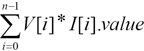  
subject to the constraint that
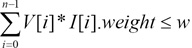

In [37]:
def gen_powerset(items):
    powerset = []
    for r in range(len(items) + 1):
        powerset.extend(combinations(items, r))
    return powerset

In [53]:
def choose_best(pset, max_weight, get_val, get_weight):
    best_value = 0.0
    best_set = None

    for items in pset:
        items_value = 0.0
        items_weight = 0.0
        for item in items:
            items_value += get_val(item)
            items_weight += get_weight(item)

        if items_weight <= max_weight and items_value > best_value:
            best_value = items_value
            best_set = items

    return best_set, best_value

def test_best(max_weight=20):
    items = build_items()
    pset = gen_powerset(items)
    taken, val = choose_best(pset, max_weight, Item.get_value, Item.get_weight)
    print('Total value of items taken is', val)
    for item in taken:
        print(f'[{item._name},{item._value},{item._weight}]')

In [54]:
test_best()

Total value of items taken is 175.0
[Clock,75,10]
[Painting,90,9]
[Book,10,1]


# Graph Optimization Problems

A graph is a set of objects called <b>nodes</b> (or <b>vertices</b>) connected by a set of <b>edges</b> (or <b>arcs</b>). If the graph is unidirectional the graph is called directed graph or digraph. 
 - Source or parent 
 - destination or child 
 
A path from a node to itself is called a cycle. A graph containing a cycle is called cyclic, and a graph that contains no cycles is called acyclic.

The first documented use of graphs in mathematics was in 1735 when the Swiss mathematician <b>Leonhard Euler</b> used what has come to be known as graph theory to formulate and solve the <b>Königsberg bridges</b> problem.
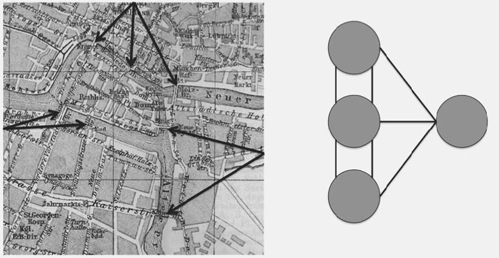  

If a weight is associated with each edge in a graph (or digraph), it is called a weighted graph.
The structure of the World Wide Web can be represented as a digraph in which the nodes are webpages with an edge from node A to node B if and only if there is a link to page B on page A. Traffic patterns could be modeled by adding a weight to each edge indicating how often is it used.

In [94]:
class Node(object):
    def __init__(self,name):
        self._name = name
    def get_name(self):
        return self_name
    def __str__(self):
        return self._name

In [95]:
class Edge(object):
    def __init__(self,src,dest):
        """src and dest are nodes."""
        self._src = src
        self._dest = dest
    def get_source(self):
        return self._src
    def get_destination(self):
        return self._dest
    def __str__(self):
        return self._src.get_name()+'->'+self._dest.get_name()

In [96]:
class weight_edge(Edge):
    def __init__(self,src,dest,weight=1.0):
        """src,dest:nodes,weight:number."""
        self._src = src
        self._dest = dest
        self._weight = weight
    def get_weight(self):
        return self._weight
    def __str__(self):
        return (f'{self._src.get_name()}->({self._weight})'+f'{self._dest.get_name()}')

In [97]:
class Digraph(object):
    """
    nodes is a list of nodes.
    edges is a dict mapping each node to list of each of its children. 
    """
    def __init__(self):
        self._nodes = []
        self._edges = {}
        
    def add_node(self,node):
        if node in self._nodes:
            raise ValueError("Duplicate node")
        else:
            self._nodes.append(node)
            self._edges[node]=[]
    def add_edge(self,edge):
        src = edge.get_source()
        dest = edge.get_destination()
        if not (src in self._nodes and dest in self._nodes):
            raise ValueError("Node not in graph.")
        self._edges[src].append(dest)
    def children_of(self,node):
        return self._edges[node]
    def has_node(self,node):
        return node in self._edges
    def __str__(self):
        result = ''
        for src in self._nodes:
            for dest in self._edges[src]:
                result = (result + src.get_name()+'->'+dest.get_name()+'\n')
        return result[:-1] 

In [98]:
class Graph(Digraph):
    def add_edge(self,edge):
        Digraph.add_edge(self,edge)
        rev = Edge(edge.get_destination(),edge.get_source())
        Digraph.add_edge(self,rev)

# Some Classic Graph-Theoretic Problems

Some of the best-known graph optimization problems are:  
• <b>Shortest path</b>. For some pair of nodes, n1 and n2, find the shortest sequence of edges <sn, dn> (source node and destination node)

• <b>Shortest weighted path</b>. This is like the shortest path, except instead of choosing the shortest sequence of edges that connects two nodes, we define some function on the weights of the edges in the sequence (e.g., their sum) and minimize that value. This is the kind of problem solved by Google and Apple Maps when asked to compute driving directions between two points.

• <b>Min cut</b>. Given two sets of nodes in a graph, a cut is a set of edges whose removal eliminates all paths from each node in one set to each node in the other.

• <b>Maximum clique</b>. A clique is a set of nodes such that there is an edge between each pair of nodes in the set.

# Shortest Path: Depth-First Search and Breadth-First Search

“everybody on this planet is separated by only six other people.” - <b>John Guare</b>

In [99]:
def print_path(path):
    """
    Path is a list of nodes.
    """
    result = ""
    for i in range(len(path)):
        result = result + str(path[i])
        if i != len(path)-1:
            result = result + '->'
    return result

def DFS(graph,start,end,path,shortest,to_print=False):
    """
    graph:Diagraph
    start,end:nodes
    path,shortest:list of nodes
    rettuns:shortest path from start to end
    """
    path = path + [start]
    if to_print:
        print("Current DFS path:",print_path(path))
    if start==end:
        return path
    for node in graph.children_of(start):
        if node not in path: # avoid cycles
            if shortest ==None or len(path) < len(shortest):
                new_path = DFS(graph,node,end,path,shortest,to_print)
                if new_path!=None:
                    shortest = new_path
    return shortest

def shortest_path(graph,start,end,to_print=False):
    """
    graph:Diagraph
    start,end:nodes
    returns shortest path from start to end in  the graph.
    """
    return DFS(graph,start,end,[],None,to_print)

In [100]:
def test_sp():
    nodes  = []
    for name in range(6):
        nodes.append(Node(str(name)))
    g = Digraph()
    for n in nodes:
        g.add_node(n)
    g.add_edge(Edge(nodes[0],nodes[1]))
    g.add_edge(Edge(nodes[1],nodes[2]))
    g.add_edge(Edge(nodes[2],nodes[3]))
    g.add_edge(Edge(nodes[3],nodes[4]))
    g.add_edge(Edge(nodes[3],nodes[5]))
    g.add_edge(Edge(nodes[0],nodes[2]))
    g.add_edge(Edge(nodes[1],nodes[0]))
    g.add_edge(Edge(nodes[3],nodes[1]))
    g.add_edge(Edge(nodes[4],nodes[0]))
    sp = shortest_path(g,nodes[0],nodes[5],to_print=True)
    print("Shortest path found by DFS:",print_path(sp))

In [101]:
test_sp()

Current DFS path: 0
Current DFS path: 0->1
Current DFS path: 0->1->2
Current DFS path: 0->1->2->3
Current DFS path: 0->1->2->3->4
Current DFS path: 0->1->2->3->5
Current DFS path: 0->2
Current DFS path: 0->2->3
Current DFS path: 0->2->3->4
Current DFS path: 0->2->3->5
Current DFS path: 0->2->3->1
Shortest path found by DFS: 0->2->3->5


<b>Finger exercise:</b> Modify the DFS algorithm to find a path that minimizes the sum of the weights. Assume that all weights are positive integers.

In [103]:
def DFS_min_weight(graph, start, end, path, shortest_path, min_weight, current_weight, to_print=False):
    """
    graph: Diagraph
    start, end: nodes
    path, shortest_path: list of nodes
    min_weight: minimum weight found so far
    current_weight: current weight of the path
    returns: shortest path with minimum weight
    """
    path = path + [start]
    current_weight += get_weight_of_path(graph, path)
    
    if to_print:
        print("Current DFS path:", print_path(path))
    
    if start == end:
        if min_weight is None or current_weight < min_weight:
            return path
        else:
            return shortest_path
    
    for node in graph.children_of(start):
        if node not in path:  # avoid cycles
            if min_weight is None or current_weight < min_weight:
                new_path = DFS_min_weight(graph, node, end, path, shortest_path, min_weight, current_weight, to_print)
                if new_path != shortest_path:
                    shortest_path = new_path
                    min_weight = current_weight
    return shortest_path

def shortest_path_min_weight(graph, start, end, to_print=False):
    """
    graph: Diagraph
    start, end: nodes
    returns shortest path with minimum weight in the graph.
    """
    return DFS_min_weight(graph, start, end, [], None, None, 0, to_print)

def get_weight_of_path(graph, path):
    """
    Calculate the weight of a given path in the graph.
    """
    weight = 0
    for i in range(len(path) - 1):
        current_element = path[i]
        if isinstance(current_element, Edge):
            src, dest = current_element.get_source(), current_element.get_destination()
            weight += current_element.get_weight()
        else:
            continue
    return weight


In [104]:
def test_sp1():
    nodes  = []
    for name in range(6):
        nodes.append(Node(str(name)))
    g = Digraph()
    for n in nodes:
        g.add_node(n)
    g.add_edge(Edge(nodes[0],nodes[1]))
    g.add_edge(Edge(nodes[1],nodes[2]))
    g.add_edge(Edge(nodes[2],nodes[3]))
    g.add_edge(Edge(nodes[3],nodes[4]))
    g.add_edge(Edge(nodes[3],nodes[5]))
    g.add_edge(Edge(nodes[0],nodes[2]))
    g.add_edge(Edge(nodes[1],nodes[0]))
    g.add_edge(Edge(nodes[3],nodes[1]))
    g.add_edge(Edge(nodes[4],nodes[0]))
    sp_min_weight = shortest_path_min_weight(g, nodes[0], nodes[5], to_print=True)
    print("Shortest path with minimum weight:", print_path(sp_min_weight))

In [105]:
test_sp1()

Current DFS path: 0
Current DFS path: 0->1
Current DFS path: 0->1->2
Current DFS path: 0->1->2->3
Current DFS path: 0->1->2->3->4
Current DFS path: 0->1->2->3->5
Shortest path with minimum weight: 0->1->2->3->5


In [107]:
def BFS(graph,start,end,to_print = False):
    """
    graph:Diagraph
    start,end : nodes
    returns:shortest path from start to end.
    """
    init_path = [start]
    path_queue = [init_path]
    while len(path_queue)!=0:
        """Get and remove the oldest path in path_queue
        """
        tmp_path = path_queue.pop(0)
        if to_print:
            print('Current BFS path:',print_path(tmp_path))
        last_node = tmp_path[-1]
        if last_node == end:
            return tmp_path
        for next_node in graph.children_of(last_node):
            if next_node not in tmp_path:
                new_path = tmp_path+[next_node]
                path_queue.append(new_path)
    return None

In [109]:
# sp = BFS(g, nodes[0], nodes[5])
# print('Shortest path found by BFS:',print_path(sp))

<b>Finger exercise:</b> Consider a digraph with weighted edges. Is the first path found by BFS guaranteed to minimize the sum of the weights of the edges?  

Ans: No, the first path found by BFS in a digraph with weighted edges is not guaranteed to minimize the sum of the weights of the edges. BFS (Breadth-First Search) is designed to find the shortest path in terms of the number of edges (i.e., the fewest number of edges between two nodes). It does not take into account the weights of the edges.